In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


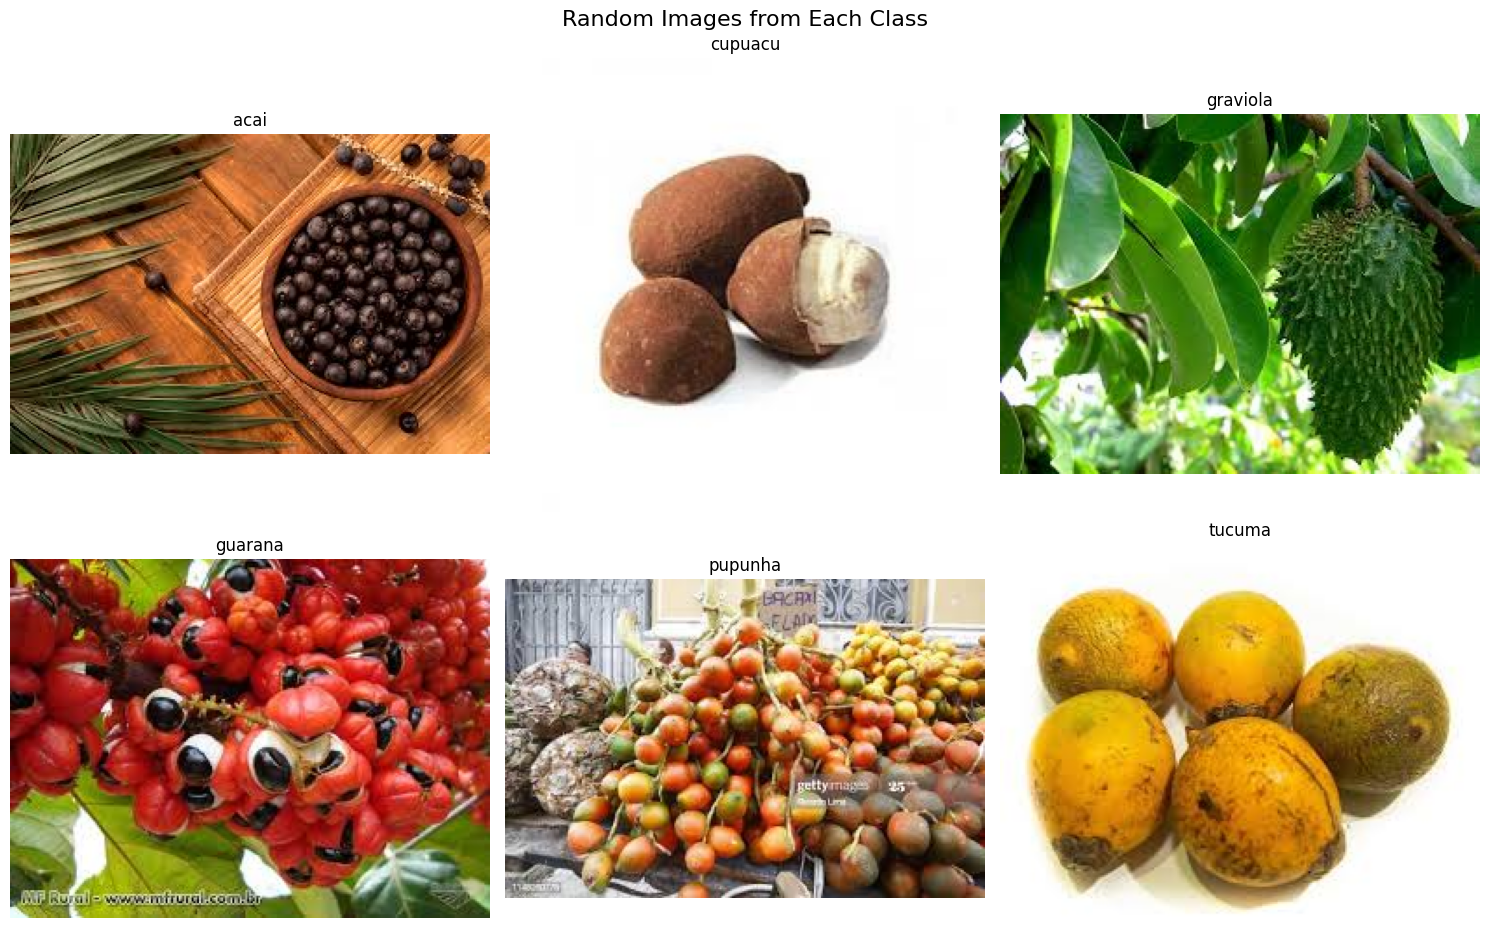

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the train directory path
train_dir = '/content/drive/MyDrive/FruitinAmazon/train'
test_dir = '/content/drive/MyDrive/FruitinAmazon/test'

# Get the list of class directories
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
class_dirs.sort()  # Sort for consistent order
print(f"Found {len(class_dirs)} classes: {class_dirs}")

# Select one random image from each class
images = []
class_names = []
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if image_files:  # Ensure there’s at least one image
        random_image = random.choice(image_files)
        image_path = os.path.join(class_path, random_image)
        images.append(image_path)
        class_names.append(class_dir)

# Check if we have images to display
if not images:
    raise ValueError("No images found in the dataset!")

# Display images in a 2-row grid
rows = 2
cols = (len(images) + 1) // 2  # Ceiling division to fit all classes
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))  # Adjust figure size as needed
fig.suptitle("Random Images from Each Class", fontsize=16)

# Flatten axes array for easier indexing
axes = axes.flatten()

# Plot each image
for i, (image_path, class_name) in enumerate(zip(images, class_names)):
    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].set_title(class_name)
    axes[i].axis('off')  # Hide axes

# Hide any unused subplots (if odd number of classes)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import keras
import tensorflow as tf

image_size = (224, 224)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=image_size,
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    shuffle=False,
    image_size=image_size,
    batch_size=batch_size
)


val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size
)


Found 90 files belonging to 6 classes.
Found 30 files belonging to 6 classes.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
for images, labels in train_ds.take(1):# Take one batch
  print("Images shape:", images.shape)
  print("Labels shape:", labels.shape)


Images shape: (32, 224, 224, 3)
Labels shape: (32,)


Found 90 files belonging to 6 classes.
Found 30 files belonging to 6 classes.


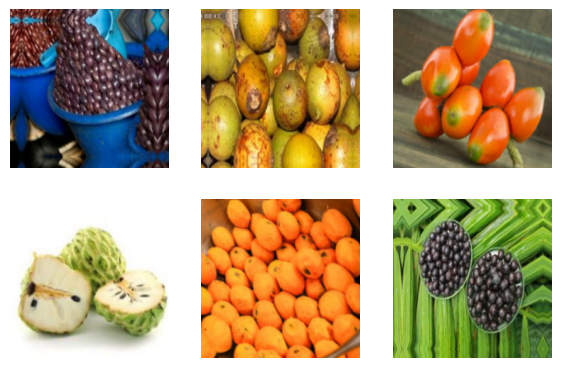

In [ ]:
# import tensorflow as tf
# from tensorflow.keras import layers
# import matplotlib.pyplot as plt

# # Define image size and batch size
# img_size = (224, 224)
# batch_size = 32

# # Load train and test datasets
# train_dataset = tf.keras.utils.image_dataset_from_directory(
#     train_dir,
#     shuffle=True,
#     image_size=img_size,
#     batch_size=batch_size  # Corrected parameter name
# )

# test_dataset = tf.keras.utils.image_dataset_from_directory(
#     test_dir,
#     shuffle=False,
#     image_size=img_size,
#     batch_size=batch_size  # Corrected parameter name
# )

# # Define data augmentation
# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip("horizontal"),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.2),
# ])

# # Visualizing augmented images
# def visualization(dataset):
#     plt.figure(figsize=(7, 7))

#     for images, _ in dataset.take(1):  # Take one batch
#         for i in range(6):  # Show 6 images
#             image = tf.expand_dims(images[i], axis=0)  # Expand dimensions to match batch format
#             augmented_img = data_augmentation(image)  # Apply augmentation
#             augmented_img = tf.squeeze(augmented_img)  # Remove batch dimension

#             plt.subplot(3, 3, i + 1)
#             plt.imshow(augmented_img.numpy().astype("uint8"))
#             plt.axis("off")

#     plt.show()

# # Call the function (must be outside the function definition)
# visualization(train_dataset)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Lambda, Rescaling
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]

def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

# Define the model using the Sequential API with a list of layers
model = Sequential([
    # Data augmentation applied using Lambda layer
    layers.Lambda(data_augmentation, input_shape=(224, 224, 3)),
    # Rescaling layer to normalize pixel values
    layers.Rescaling(1./255),
    # First Convolutional Block
    Conv2D(32, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    # Second Convolutional Block
    Conv2D(64, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    # Third Convolutional Block
    Conv2D(128, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    # Fourth Convolutional Block
    Conv2D(256, (3, 3), padding='same', activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    # Flatten the output of the last Conv2D layer
    Flatten(),
    # First Fully Connected Layer
    Dense(512, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    # Second Fully Connected Layer
    Dense(256, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    # Third Fully Connected Layer
    Dense(128, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    # Fourth Fully Connected Layer
    Dense(64, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    # Output Layer with 10 neurons (for classification task with 10 classes)
    Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use this for integer labels
              metrics=['accuracy'])


# Summary of the model
model.summary()

checkpoint = ModelCheckpoint(
    'best_model.keras',  # Save best model
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=20,  # Stop after 20 epochs with no improvement
    mode='max',
    verbose=1
)
# Train model
histroy = model.fit(
    train_ds,
    epochs=250,
    validation_data=test_ds,
    callbacks=[checkpoint, early_stopping]
)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_2 (Lambda)                    │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 26,257,930 (100.17 MB)

 Trainable params: 26,255,050 (100.16 MB)

 Non-trainable params: 2,880 (11.25 KB)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.1256 - loss: 2.8184
Epoch 1: val_accuracy improved from -inf to 0.16667, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 11s/step - accuracy: 0.1220 - loss: 2.8342 - val_accuracy: 0.1667 - val_loss: 2.2745
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.1032 - loss: 2.7428
Epoch 2: val_accuracy did not improve from 0.16667
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 7s/step - accuracy: 0.1080 - loss: 2.7458 - val_accuracy: 0.1667 - val_loss: 2.2656
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.0861 - loss: 2.9187
Epoch 3: val_accuracy did not improve from 0.16667
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.0979 - loss: 2.8872 - val_accuracy: 0.1667 - val_loss: 2.2644
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.2095 - loss: 2.3479
Epoch 4: val_accuracy did not improve from 0.16667
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.2127 - loss: 2.3504 - val_accuracy: 0.1667

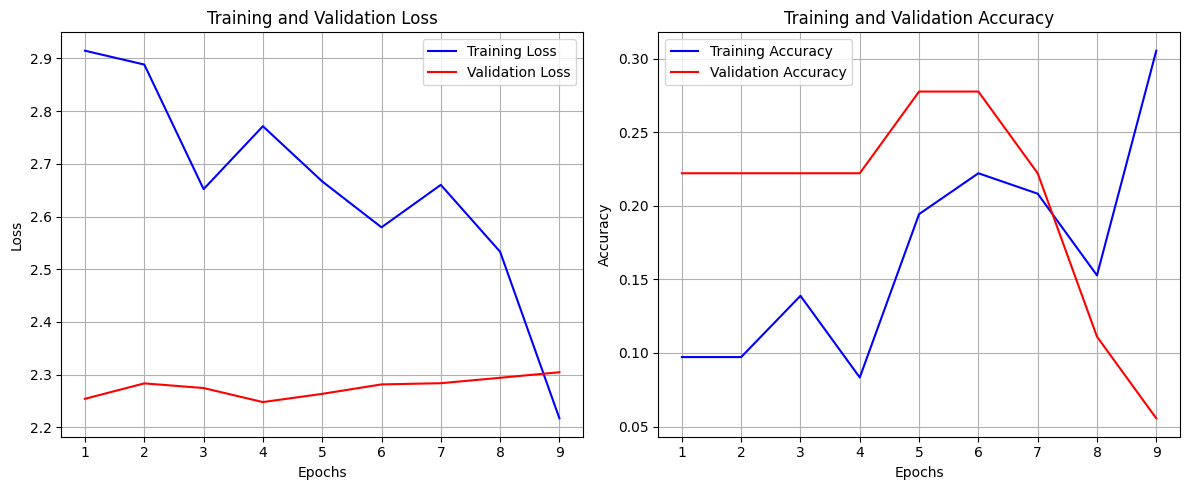

In [ ]:
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# Create subplots: 1 row, 2 columns
plt.figure(figsize=(12, 5))

# Plot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np

# Load VGG16 base model (without top, pretrained on ImageNet)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze all convolutional layers

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

# Create model (this was the part that broke)
model = Model(inputs=base_model.input, outputs=predictions)

# NOW we compile it (without any misplaced arguments)
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
checkpoint = ModelCheckpoint(
    'vgg16_best_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    mode='max',
    verbose=1
)

# Train
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=test_ds,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.0319 - loss: 17.6581 
Epoch 1: val_accuracy improved from -inf to 0.23333, saving model to vgg16_best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 100s 38s/step - accuracy: 0.0323 - loss: 17.6237 - val_accuracy: 0.2333 - val_loss: 4.3470
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.2221 - loss: 9.8444 
Epoch 2: val_accuracy improved from 0.23333 to 0.33333, saving model to vgg16_best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 119s 28s/step - accuracy: 0.2277 - loss: 9.7984 - val_accuracy: 0.3333 - val_loss: 2.8298
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.2675 - loss: 8.0589 
Epoch 3: val_accuracy improved from 0.33333 to 0.46667, saving model to vgg16_best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 28s/step - accuracy: 0.2645 - loss: 8.0481 - val_accuracy: 0.4667 - val_loss: 2.0095
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.2347 - loss: 6.0449 
Epoch 4: val_accuracy improved from 0.46

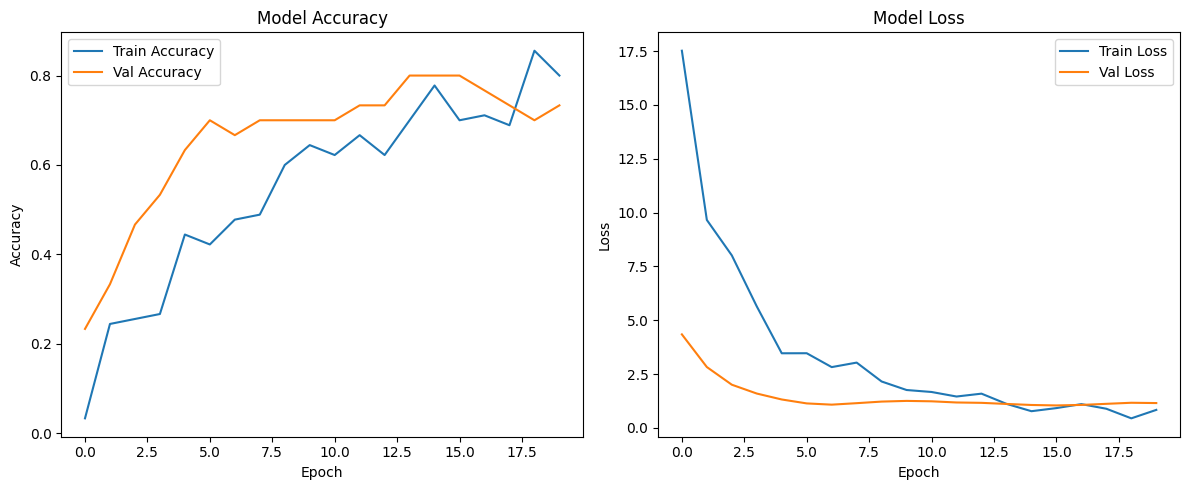

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get predictions
y_true = np.concatenate([y for _, y in test_ds], axis=0)
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Report
print(classification_report(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.80      0.80      0.80         5
           2       0.83      1.00      0.91         5
           3       0.62      1.00      0.77         5
           4       0.67      0.40      0.50         5
           5       1.00      0.80      0.89         5

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.72        30
weighted avg       0.74      0.73      0.72        30

